In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as data

In [97]:
import fix_yahoo_finance as yf
sData = yf.download('TSLA', start=  '2010-01-01', end='2023-10-27')
sData.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [98]:
sData.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600


In [99]:
sData.shape

(3356, 6)

In [100]:
sData = sData.reset_index()
sData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [101]:
sData = sData.drop(columns = ['Date', 'Adj Close'], axis=1)
sData.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


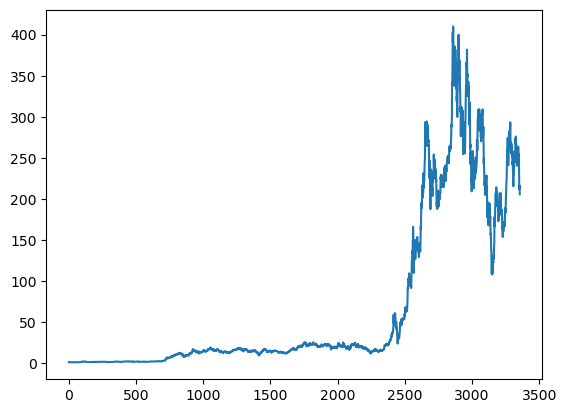

In [102]:
plt.plot(sData.Close)

In [103]:
ma100 = sData.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3351    253.1465
3352    253.2280
3353    253.3180
3354    253.3025
3355    253.1840
Name: Close, Length: 3356, dtype: float64

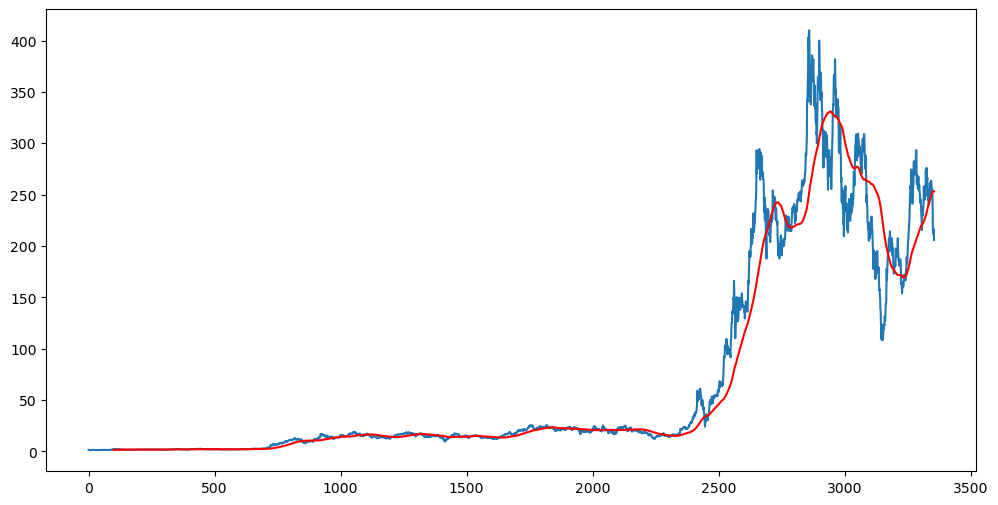

In [104]:
plt.figure(figsize = (12,6))
plt.plot(sData.Close)
plt.plot(ma100,'r')

In [105]:
ma200 = sData.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3351    214.67190
3352    215.18060
3353    215.69790
3354    216.16115
3355    216.59570
Name: Close, Length: 3356, dtype: float64

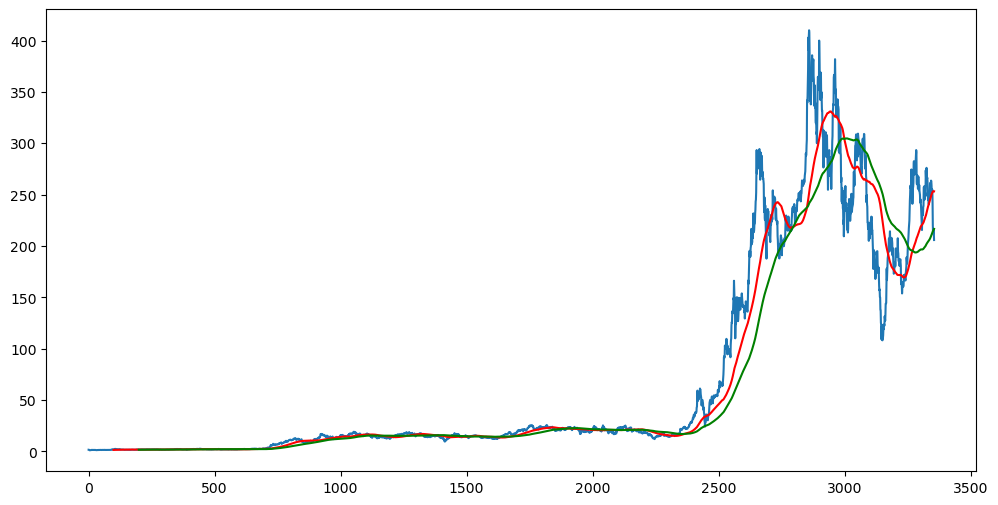

In [106]:
plt.figure(figsize = (12,6))
plt.plot(sData.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [107]:
data_train = pd.DataFrame(sData['Close'][0:int(len(sData)*.70)])
data_test = pd.DataFrame(sData['Close'][int(len(sData)*.70) : int(len(sData))])

print(data_train.shape)
print(data_test.shape)

(2349, 1)
(1007, 1)


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [109]:
data_training_array = scaler.fit_transform(data_train)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.64702054],
       [0.76890569],
       [0.84596422]])

In [110]:
data_training_array.shape

(2349, 1)

In [111]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]) :
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [112]:
x_train.shape

(2249, 100, 1)

In [113]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [114]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, 
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1 ))

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [116]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
71/71 [==============================] - 21s 227ms/step - loss: 0.0681
Epoch 2/50
71/71 [==============================] - 16s 231ms/step - loss: 0.0147
Epoch 3/50
71/71 [==============================] - 16s 230ms/step - loss: 0.0114
Epoch 4/50
71/71 [==============================] - 19s 269ms/step - loss: 0.0113
Epoch 5/50
71/71 [==============================] - 20s 280ms/step - loss: 0.0110
Epoch 6/50
71/71 [==============================] - 21s 292ms/step - loss: 0.0091
Epoch 7/50
71/71 [==============================] - 23s 329ms/step - loss: 0.0084
Epoch 8/50
71/71 [==============================] - 19s 264ms/step - loss: 0.0088
Epoch 9/50
71/71 [==============================] - 21s 299ms/step - loss: 0.0082
Epoch 10/50
71/71 [==============================] - 24s 342ms/step - loss: 0.0066
Epoch 11/50
71/71 [==============================] - 22s 303ms/step - loss: 0.0070
Epoch 12/50
71/71 [==============================] - 31s 432ms/step - loss: 0.0068
Epoch 13/50
7

In [138]:
model.save('keras_model.keras')
import tensorflow as tf
model = tf.keras.models.load_model('keras_model.keras')

In [139]:
past_100_days = data_train.tail(100)

In [140]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [141]:
final_df.shape

(1107, 1)

In [142]:
final_df.head()

,Close
0,13.730000
1,13.633333
2,14.192000
3,14.473333
4,13.950667


In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(final_df)
input_data

array([[2.43899553e-04],
       [0.00000000e+00],
       [1.40957733e-03],
       ...,
       [5.11904871e-01],
       [5.01560115e-01],
       [4.84756211e-01]])

In [144]:
input_data.shape

(1107, 1)

In [145]:
x_test = []
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [146]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [147]:
print(x_test.shape)
print(y_test.shape)

(1007, 100, 1)
(1007,)


In [148]:
y_predicted = model.predict(x_test)

32/32 [==============================] - 3s 83ms/step


In [149]:
y_predicted.shape

(1007, 1)

In [150]:
y_test

array([0.02072481, 0.0187921 , 0.01858858, ..., 0.51190487, 0.50156012,
       0.48475621])

In [151]:
y_predicted

array([[0.06190574],
       [0.06220818],
       [0.06257695],
       ...,
       [0.5220331 ],
       [0.5081173 ],
       [0.49506906]], dtype=float32)

In [152]:
scaler.scale_

array([0.00252311])

In [153]:
scale_factor = 1/0.00252311
y_predicted = y_predicted* scale_factor
y_test = y_test* scale_factor

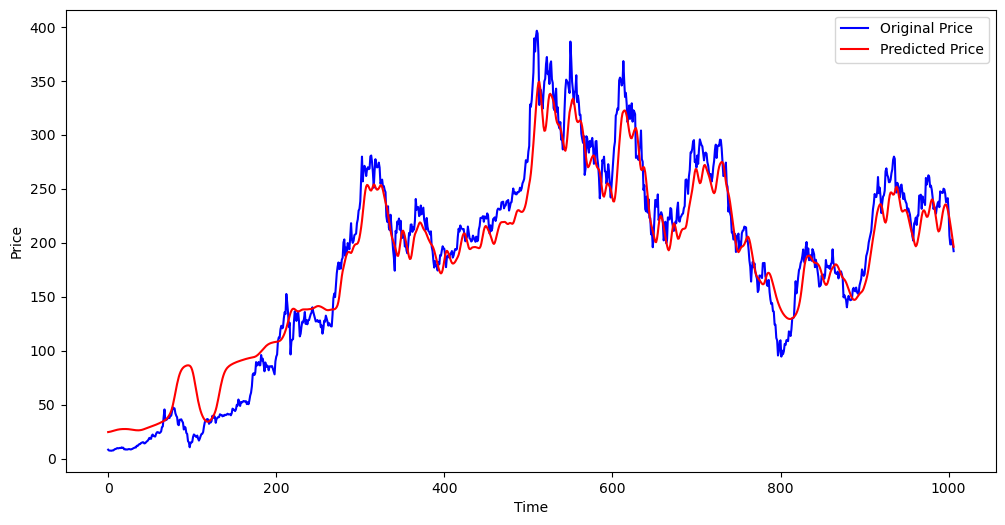

In [154]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()